# Homework 2

Homework 2 is due on Monday, February 3.

## Written Part

**Problem 1:** Consider an $m\times n$ matrix $X$, an $m$-component vector $y$, and an $n$-component vector $\theta$. Suppose the matrix $X$ is tall and skinny, that is, suppose $m>n$. We saw in class the the gradient of the MSE cost function is proportional to $X^TX\theta-X^Ty = X^T(X\theta-y)$. This quantity can be computed two different ways: 

**Way 1:**
1. Compute the matrix product $X^TX$
2. Compute the matrix-vector product $(X^TX)\theta$
3. Compute the matrix-vector product $X^Ty$
4. Subtract the vector $X^Ty$ from the vector $(X^TX)\theta$

**Way 2:**
1. Compute the matrix-vector product $X\theta$
2. Subtract the vector $y$ from the vector $X\theta$
3. Compute the matrix-vector product $ X^T(X\theta-y)$

What would be the most efficient way in terms of operations (multiplications, additions, and subtractions) of computing it?


**Answer:**

Way 2 is the most efficient way to compute the gradient. Way 2 has no matrix products which is a cubic at best operation. Way 2 has only matrix-vector products which are not as significant as matrix products.

**Problem 2 (for M462 students):** Consider the function $f(x)=x^TMx$, where $x$ is a vector, and $M$ is an $n\times n$ matrix (possibly non-symmetric). Find the gradient of $f(x)$. 

**Answer:**

$ f(x)= x^TMx$

$ \frac{\partial f}{\partial x_{i}} = [\begin{bmatrix}0&\cdots&0&1&0&\cdots&0\end{bmatrix}Mx + x^T0x + x^TM\begin{bmatrix}0\\\vdots\\0\\1\\0\\\vdots\\0\end{bmatrix}$

$ \frac{\partial f}{\partial x_{i}} = \begin{bmatrix} \text{row i of M} \end{bmatrix}x + x^T\begin{bmatrix}\text{col}\\\text{i}\\\text{of}\\\text{M}\end{bmatrix}$


$ \frac{\partial f}{\partial x_{i}} = Mx + M^Tx$

**Problem 2 (for M562 students):** Consider two convex functions $f(x)$ and $g(x)$. Assume $g(x)$ is non-decresing. Show that the composite function $h(x)=g(f(x))$ is also convex.

**Problem 3:** Consider the MSE cost function $\mbox{MSE}(\theta)=\|y-X\theta\|_2^2$. Find the second-order partial derivatives matrix (the *Hessian matrix*)

$$
\begin{bmatrix}
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1^2} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1\partial \theta_2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1\partial\theta_n} \\
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2\partial \theta_1} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2^2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2\partial\theta_n} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_n\partial \theta_1} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_n\partial \theta_2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial\theta_n^2}
\end{bmatrix}
$$

**Answer:**

$$
\begin{bmatrix}
\dfrac{2}{m}X^T((X\theta_1 - y)(X\theta_1 - y)) & \dfrac{2}{m}X^T((X\theta_1 - y)(X\theta_2 - y)) &\cdots& \dfrac{2}{m}X^T((X\theta_1 - y)(X\theta_n - y)) \\
\dfrac{2}{m}X^T((X\theta_2 - y)(X\theta_1 - y)) & \dfrac{2}{m}X^T((X\theta_2 - y)(X\theta_2 - y)) &\cdots& \dfrac{2}{m}X^T((X\theta_2 - y)(X\theta_n - y)) \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{2}{m}X^T((X\theta_n - y)(X\theta_1 - y)) & \dfrac{2}{m}X^T((X\theta_n - y)(X\theta_2 - y)) &\cdots& \dfrac{2}{m}X^T((X\theta_n - y)(X\theta_n - y)) 
\end{bmatrix}
$$

## Programming Part

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### The Iris Dataset

The *iris* dataset contains a bunch of measurements for 150 flowers representing three species of iris (setosa, versicolor and virginica).
For each flower, we have its petal length, petal width, sepal length, and sepal width, as well as its species.

In [14]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris_data.head(5) #first 5 rows

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let us look at the scatterplots for each of the six pairs of measurements.

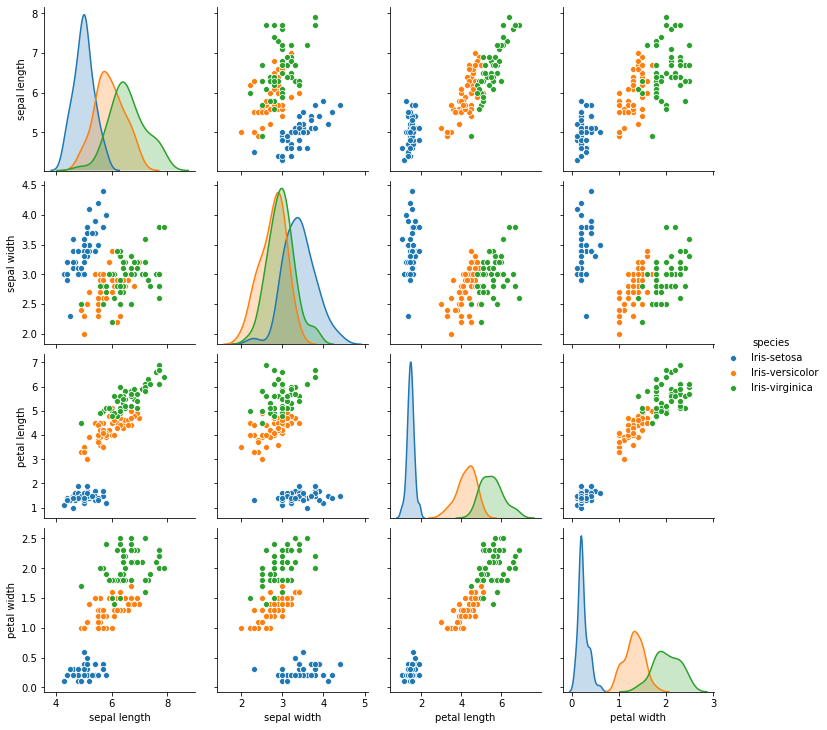

In [3]:
sns.pairplot(data=iris_data,hue='species')

### Assignments

**Part 1:** Add to the iris_data dataframe a new column called *target*. For each flower, set

$$
\mbox{target} = \left\{ \begin{array}{cc} 
1 & \mbox{ if species }=\mbox{ setosa},\\
0 & \mbox{ if species }\neq \mbox{ setosa}.
\end{array}\right.
$$

Hint: the easiest way to do is by using pandas.Series.map (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

In [145]:
rule = {'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':0}
iris_data['target'] = iris_data['species'].map(rule)

**Part 2:** Use Gradient Descent to train a linear model for predicting the target values.

In [146]:
y = iris_data['target'].to_numpy()
y = y[:,None]
m = len(iris_data)

In [140]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = iris_data[features].to_numpy()
X.shape

(150, 4)

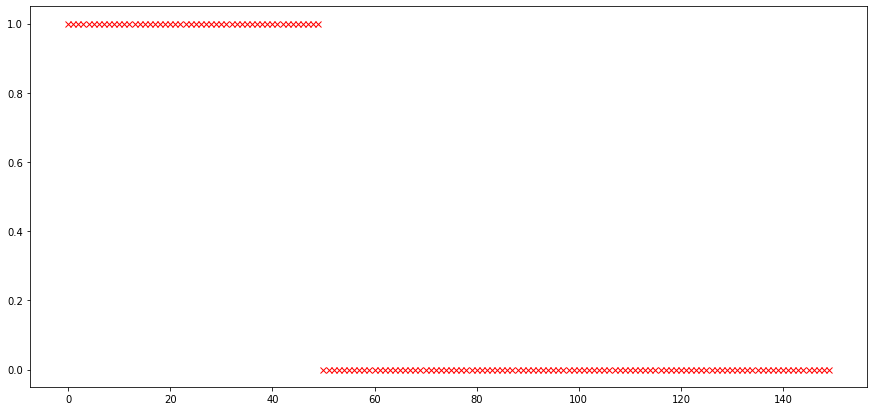

In [138]:
plt.figure(figsize=(15,7))
plt.plot(y,'rx')

(150, 4)

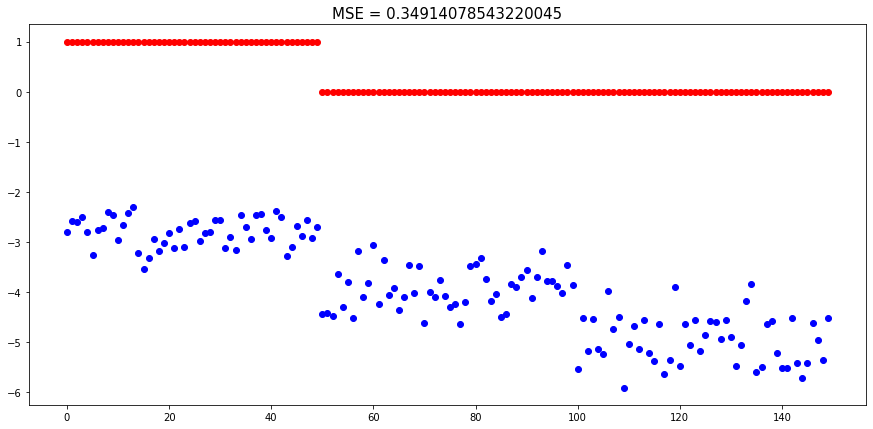

In [147]:

s = .01

theta = np.random.randn(4,1)

MSE = np.linalg.norm(X@theta - y)/m

plt.figure(figsize=(15,7))
#plt.plot(x,y,'rx')

y_predicted = X@theta

plt.plot(y, 'ro')
plt.plot(y_predicted,'bo')
plt.title('MSE = ' + str(MSE), fontsize=15)

X.shape

In [143]:
y[:,None].shape

(150, 1)

Text(0.5, 1.0, 'MSE = 0.01174474340539133')

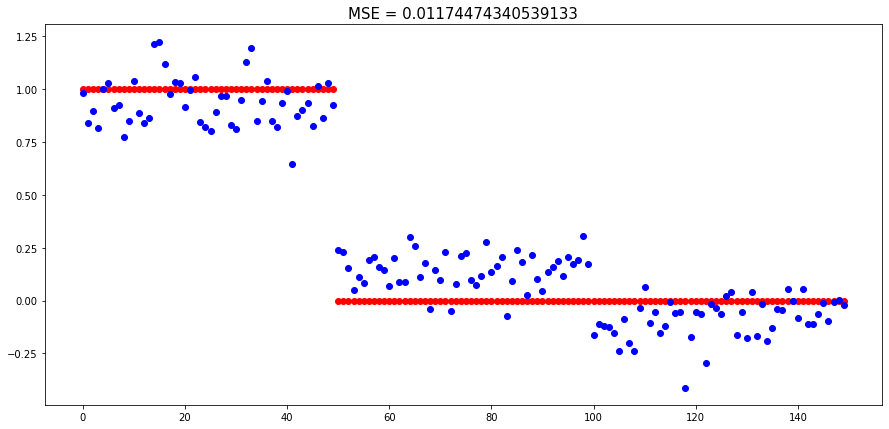

In [151]:
'Gradient Descent Step'
for i in range(100000):
    gradient = (2/m)*X.T@(X@theta-y)
    theta = theta - s*gradient

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

plt.figure(figsize=(15,7))
#plt.plot(x,y,'rx')

y_predicted = X@theta

plt.plot(y,'ro')
plt.plot(y_predicted,'bo')

plt.title('MSE = ' + str(MSE), fontsize=15)

In [125]:
len(y_predicted)

150



**Part 3:** Write a function for predicting whether the species of an iris flower is setosa or non-setosa. Your function must use the linear model from part 2 and follow the classification rule:
1. if the predicted target value is larger than or equal to 0.5, then the species is setosa.
2. if the predicted target value is less than 0.5, then the species is not setosa.

How many non-setosa iris flowers are correctly classified as non-setosa?

How many non-setosa iris flowers are misclassified as setosa?

In [154]:
isSetosaCount = 0
notSetosaCount = 0
for i in y_predicted:
    if(i >= .5):
        isSetosaCount = isSetosaCount + 1
    elif (i < .5):
        notSetosaCount = notSetosaCount + 1
print(isSetosaCount)
print(notSetosaCount)

50
100
